# **INCOME EVALUATION CLASSIFICATION**


## Introduction

The dataset contains **32,561 rows and 15 columns**. It is related to **income evaluation**, where the goal is likely to predict whether a person earns over or under $50K annually based on various features.

#### Columns Overview:
1. **age (int64)**: Age of the individual.
2. **workclass (object)**: Type of employment (e.g., Private, Self-Employed, State-gov).
3. **fnlwgt (int64)**: Final weight, a demographic variable.
4. **education (object)**: Highest level of education attained.
5. **education-num (int64)**: Numerical representation of education level.
6. **marital-status (object)**: Marital status of the individual.
7. **occupation (object)**: Type of job or occupation.
8. **relationship (object)**: Family relationship (e.g., Husband, Not-in-family).
9. **race (object)**: Race of the individual.
10. **sex (object)**: Gender of the individual (Male/Female).
11. **capital-gain (int64)**: Income from investment sources, apart from wages.
12. **capital-loss (int64)**: Losses from investments, apart from wages.
13. **hours-per-week (int64)**: Number of hours worked per week.
14. **native-country (object)**: Country of origin of the individual.
15. **income (object)**: Target variable indicating if the income is **<=50K or >50K**.

#### Initial Observations:

- There are **categorical features** that will need to be encoded for modeling.
- The **'income'** column appears to be the target variable.



### **Importing Libraries**

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

### **Importing dataset**

In [39]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/income_evaluation.csv')

### **Analysing top 10 data**

In [40]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### **Checking information**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### **Renaming Columns**

In [42]:
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.strip()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### **Checking null values**

In [44]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


### **Checking duplicate rows**

In [45]:
df.duplicated().sum()

24

In [46]:
df.drop_duplicates(inplace=True)

### **Boxplot**

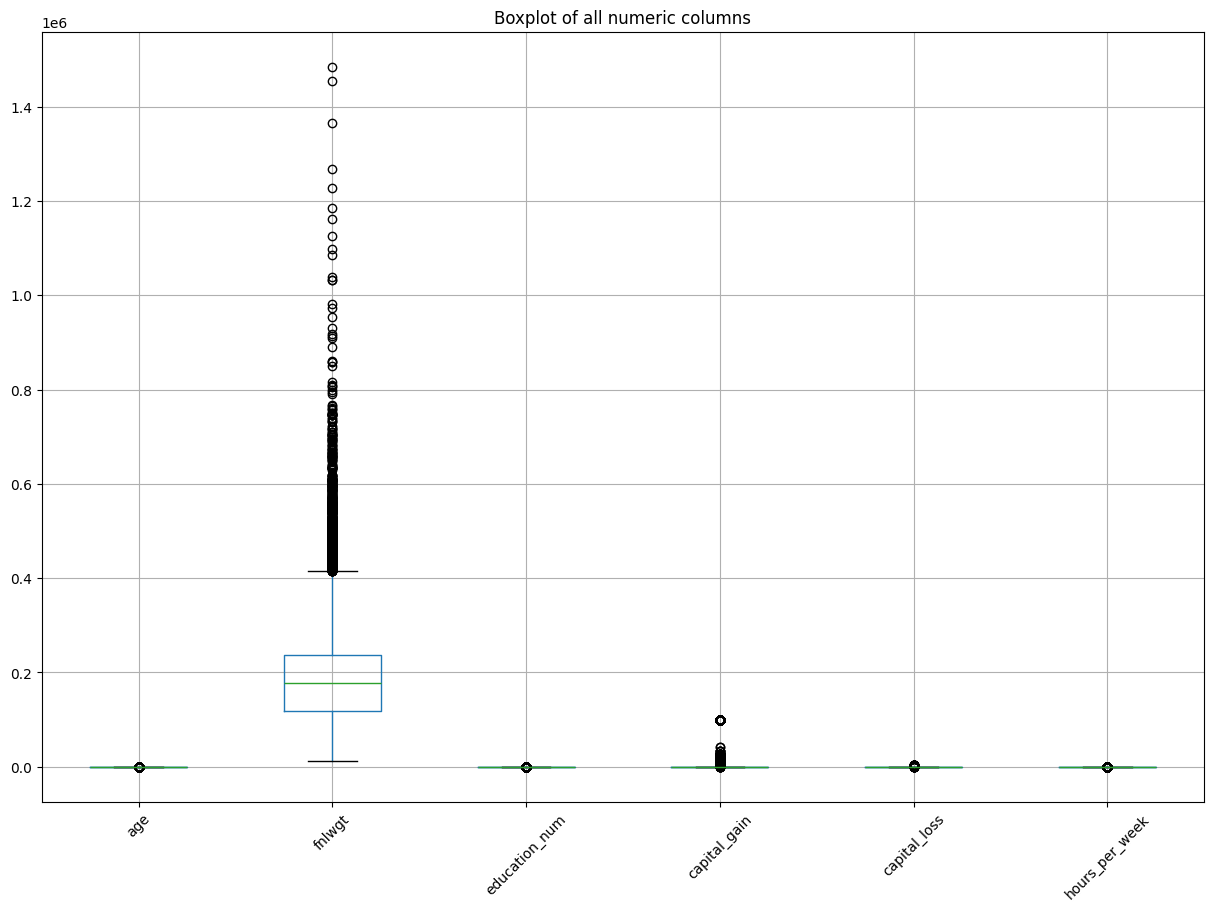

In [47]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

## **Statistical Analysis**

### Covariance

In [48]:
df[numeric_cols].cov()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,185.994594,-1.100517e+05,1.270447,7.826382e+03,317.454068,11.536939
fnlwgt,-110051.688494,1.114217e+10,-11777.880524,3.342341e+05,-436568.823027,-24629.699183
education_num,1.270447,-1.177788e+04,6.613296,2.330502e+03,82.818379,4.712652
capital_gain,7826.382249,3.342341e+05,2330.502298,5.458191e+07,-94224.613427,7152.207079
capital_loss,317.454068,-4.365688e+05,82.818379,-9.422461e+04,162491.087819,269.901814
hours_per_week,11.536939,-2.462970e+04,4.712652,7.152207e+03,269.901814,152.445672


### Correlation

In [49]:
df[numeric_cols].corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


### Heatmap

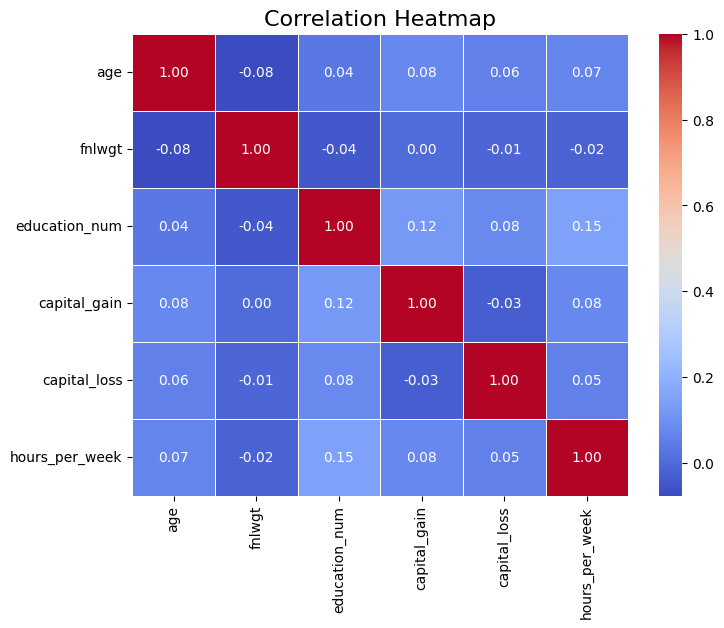

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [51]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### **Count Plot**

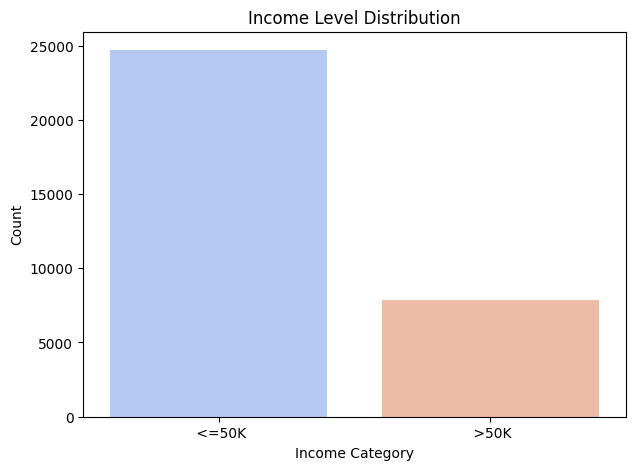

In [52]:
plt.figure(figsize=(7, 5))
sns.countplot(x="income", data=df, palette="coolwarm")
plt.title("Income Level Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

### **Histogram**

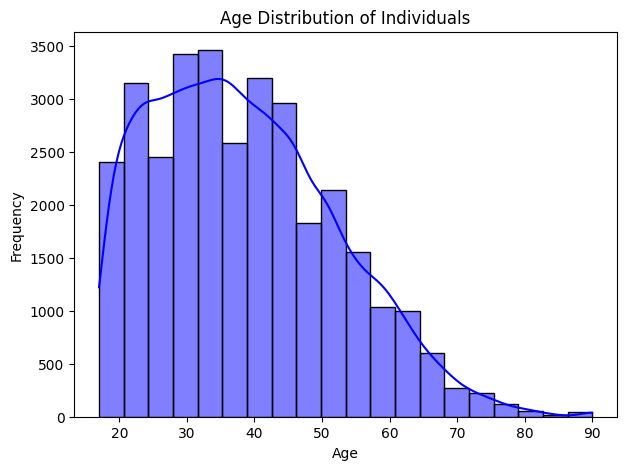

In [53]:
plt.figure(figsize=(7, 5))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### **Pie Chart**

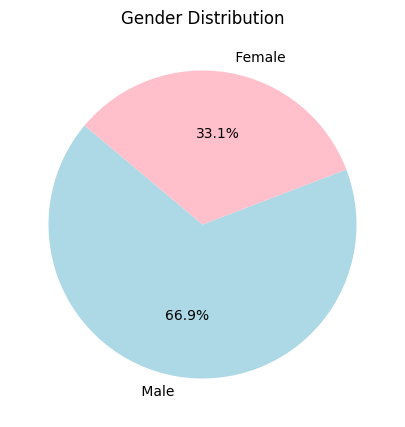

In [54]:
plt.figure(figsize=(7, 5))
gender_counts = df["sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightblue", "pink"], startangle=140)
plt.title("Gender Distribution")
plt.show()

### **Line Chart**

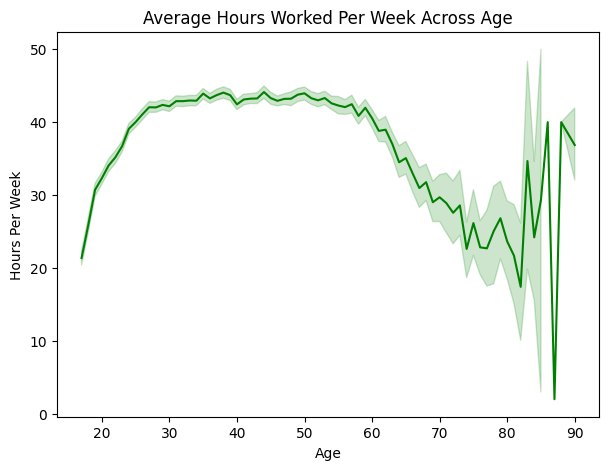

In [55]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="age", y="hours_per_week", data=df, color="green")
plt.title("Average Hours Worked Per Week Across Age")
plt.xlabel("Age")
plt.ylabel("Hours Per Week")
plt.show()

### **Splitting numerical and categorical columns**

In [56]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('income')

In [57]:
df[numerical_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [58]:
df[categorical_cols].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


### **StandardScaler and OneHotEncoder using ColumnTransformer**

In [59]:
transformer = ColumnTransformer(
    transformers=[('numerical', StandardScaler(),numerical_cols),
   ('categorical', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),
       categorical_cols)],remainder='passthrough')

### **Selecting x and y**

In [60]:
x = df.drop('income', axis=1)

In [61]:
x = transformer.fit_transform(x)

In [62]:
feature_names = list(numerical_cols)

encoded_cols = list(transformer.named_transformers_['categorical'].get_feature_names_out(categorical_cols))
feature_names.extend(encoded_cols)

In [63]:
x = pd.DataFrame(x, columns = feature_names)

In [64]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
y = df['income']

### **LabelEncoding y**

In [66]:
le = LabelEncoder()
y = le.fit_transform(y)

In [67]:
y_encoded = pd.DataFrame(y, columns = ['income'])

In [68]:
y_encoded.head()

,income
0,0
1,0
2,0
3,0
4,0


### **Scatterplot**

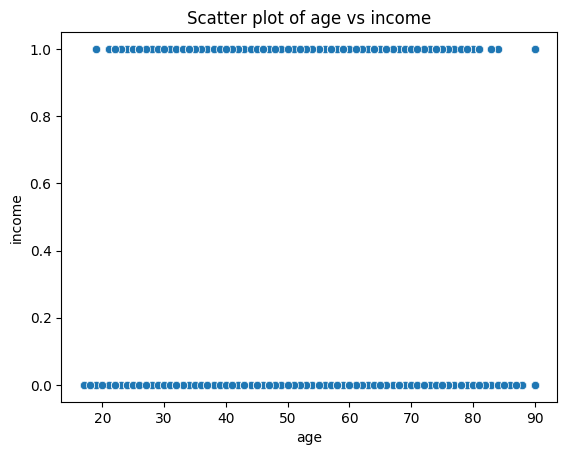

In [69]:
sns.scatterplot(df,x='age', y=y)
plt.xlabel('age')
plt.ylabel('income')
plt.title(f'Scatter plot of age vs income')
plt.show()

### **Train Test Splitting**

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Classifying Income using Logistic Regression**

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

### **Checking Accuracy**

Accuracy: 0.8567916410571604
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4905
           1       0.75      0.63      0.68      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.85      6508



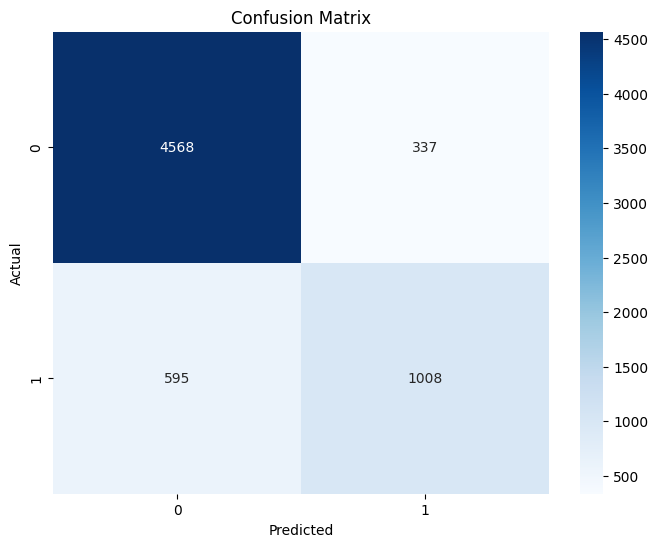

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Boosting using XGBClassifier**

In [73]:
xg_cl = XGBClassifier()
xg_cl.fit(x_train, y_train)
y_pred_xg = xg_cl.predict(x_test)

### **Checking Accuracy**

XGBoost Accuracy: 0.8712354025814383
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4905
           1       0.78      0.66      0.72      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508



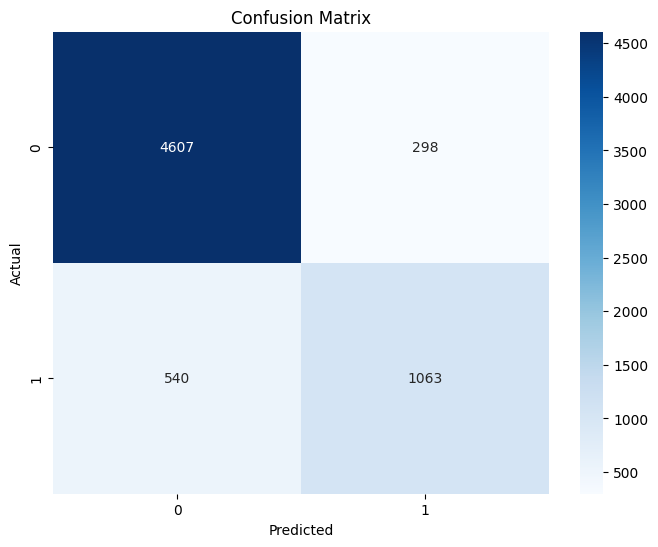

In [74]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f"XGBoost Accuracy: {accuracy_xg}")

print(classification_report(y_test, y_pred_xg))

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Summary**  


####  **EDA:**
1. **Data Cleaning:**
   - Column names are renamed to replace hyphens with underscores for consistency.
   - Duplicates are removed.
   - No missing values found.

2. **Visualizations:**
   - **Boxplot:** Shows distribution and outliers in numeric columns.
   - **Heatmap:** Displays correlation between numerical features.
   - **Count Plot:** Visualizes the distribution of the target variable, 'income'.
   - **Histogram:** Shows the distribution of the 'age' column.
   - **Pie Chart:** Visualizes gender distribution.
   - **Line Chart:** Examines the relationship between 'age' and 'hours-per-week'.
   - **Scatter Plot:** Plots 'age' vs. 'income'.

3. **Statistical Analysis:**
   - **Covariance and Correlation** are calculated for numeric features.
   - **Descriptive statistics** (mean, std, min, max, etc.) are displayed.



####  **Preprocessing:**
1. **Categorical Encoding:** OneHotEncoding for categorical variables.
2. **Standard Scaling:** Applied to numerical features for normalization.
3. **Label Encoding:** 'income' column is encoded for modeling.



####  **Model Building:**
1. **Logistic Regression:**
   - Trained with 80% of the data, tested with 20%.
   - Confusion matrix and classification report generated.
   
2. **XGBoost Classifier:**
   - More robust model compared to Logistic Regression.
   - Provides improved accuracy over Logistic Regression.

